In [1]:
pip install CFEDemands

  Using cached CFEDemands-0.6.1-py2.py3-none-any.whl (45 kB)
  Using cached ConsumerDemands-0.4.2.dev0-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 11.8 MB/s eta 0:00:0000:0100:01
  Using cached dvc-3.50.0-py3-none-any.whl (451 kB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached celery-5.4.0-py3-none-any.whl (425 kB)
  Using cached iterative_telemetry-0.0.8-py3-none-any.whl (10 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
  Using cached dvc_studio_client-0.20.0-py3-none-any.whl (16 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached dvc_objects-5.1.0-py3-none-any.whl (33 kB)
  Using cached tomlkit-0.12.4-py3-none-any.whl (37 kB)
  Using cached shtab-1.7.1-py3-none-any.whl (14 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached grandalf-0.8-py3-none-any.whl (41 kB)
  Using cached gto-1.7.1-py3-none-any.whl (46 kB)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, widgets
import requests
from urllib.parse import quote
import regex as re
#import fooddatacentral as fdc
from  scipy.optimize import linprog as lp
import warnings



# Supresses Warnings - Makes the Code clean in the Master Notebook
warnings.filterwarnings("ignore")

In [3]:
import cfe.regression as rgsn
#importing Indian Data
r = rgsn.read_pickle('nss62.rgsn')

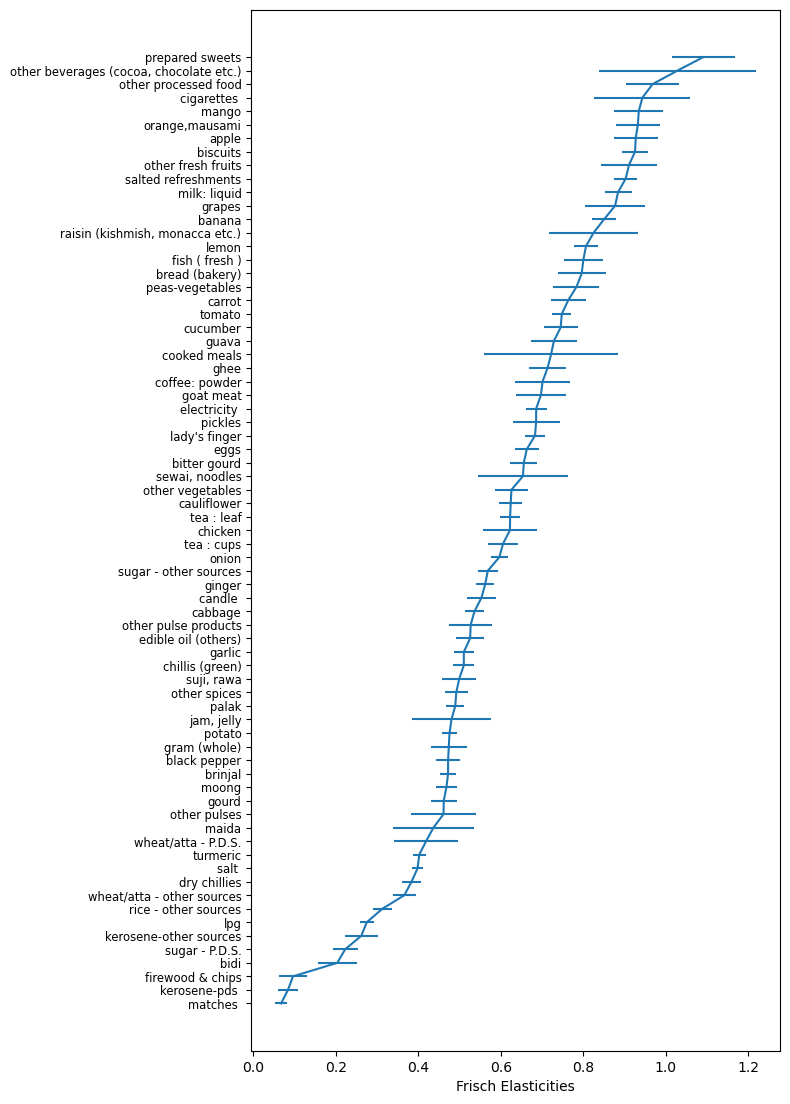

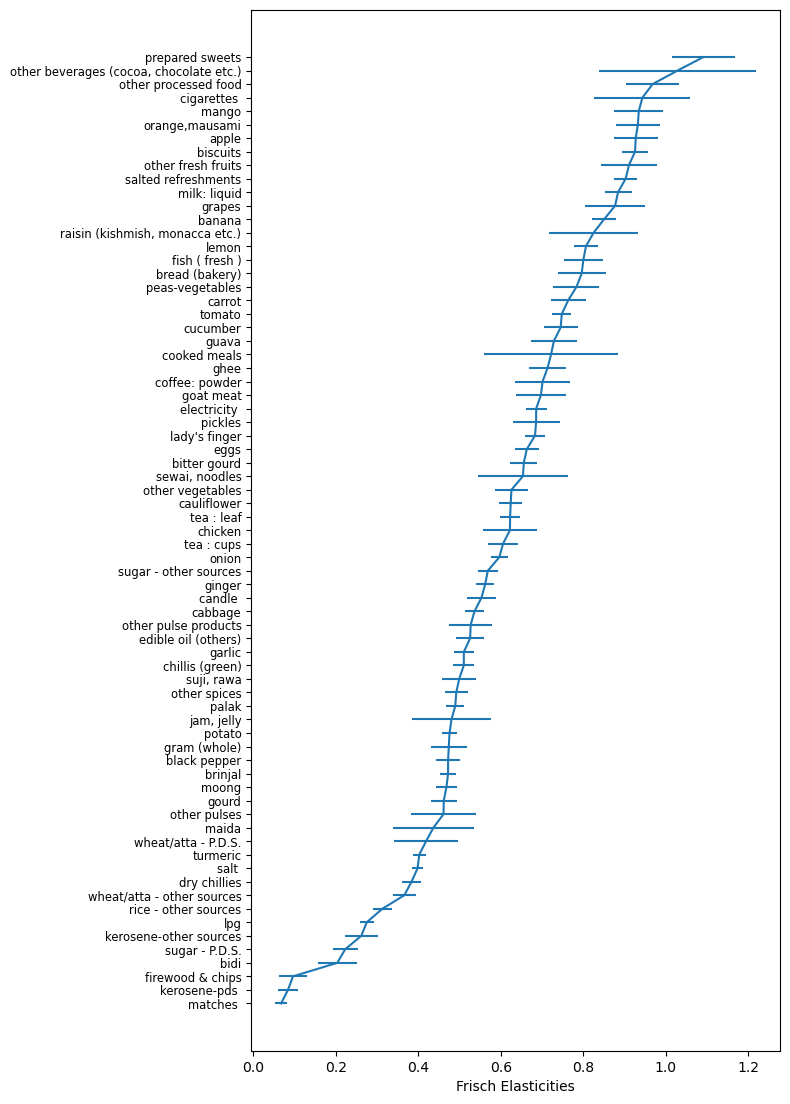

In [4]:
#individual food elasticities
r.graph_beta()

In [5]:
r.get_gamma()

k,rural,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,...,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log HSize,Constant
j,,,,,,,,,,,,,,,,,,,,,
apple,-0.186540,0.008840,-0.027590,-0.039192,-0.029061,-0.025620,-0.005908,0.054945,0.105893,0.103108,...,-0.028287,-0.035067,-0.016730,0.020330,0.078192,0.156630,0.102923,0.092867,0.182129,3.668503
banana,-0.181520,-0.044019,-0.012483,-0.021051,-0.023046,-0.004120,0.025787,0.061306,0.094603,0.106727,...,-0.020130,-0.026972,-0.029454,0.017602,0.051116,0.152408,0.118414,0.095361,0.228816,3.053637
bidi,-0.024624,0.174849,0.082365,0.075855,0.045206,0.087703,0.086802,0.077595,0.088080,0.093186,...,0.052014,0.056028,0.040036,0.079979,0.001629,-0.015344,-0.004379,0.046568,-0.075874,3.999803
biscuits,-0.231166,-0.072481,-0.037421,-0.048238,-0.052649,-0.037441,0.016031,0.101199,0.117048,0.080064,...,-0.055461,-0.024601,-0.001748,0.008543,0.076082,0.153370,0.082527,0.045536,0.262950,3.134761
bitter gourd,-0.088553,-0.030158,-0.015725,0.007538,0.023761,0.050930,0.044327,0.065147,0.109086,0.115311,...,-0.005529,0.002542,-0.012506,0.049606,0.049099,0.099278,0.073361,0.017147,0.309341,2.398580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tea : leaf,-0.209867,-0.071413,-0.036789,-0.046528,-0.020950,-0.000965,0.049915,0.093285,0.122507,0.130590,...,-0.065675,-0.050139,-0.012386,0.034659,0.082359,0.161498,0.140609,0.113932,0.447454,3.581667
tomato,-0.185712,-0.034263,-0.051071,-0.026902,-0.017168,-0.002999,0.046906,0.090234,0.095611,0.059613,...,-0.057688,-0.034097,0.001598,0.017391,0.077844,0.116611,0.074176,0.056974,0.335872,2.992590
turmeric,-0.075189,-0.016344,-0.008624,0.017096,0.033462,0.059750,0.069855,0.085744,0.089161,0.085228,...,-0.021158,0.005194,0.029611,0.042032,0.045661,0.058845,0.026704,0.001320,0.466248,2.105425


<Axes: ylabel='Density'>

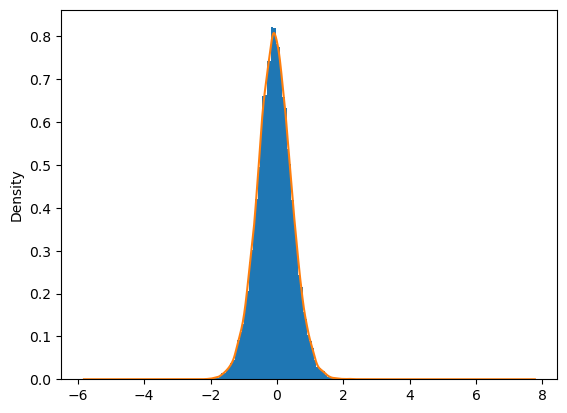

In [6]:
ax = r.get_w().plot.hist(bins=100,density=True)
r.get_w().plot.kde(ax=ax)

In [7]:
xhat = r.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile (median)
xref

3846.0460137326313

In [8]:
# Implied relative prices
p = np.exp(r.get_Ar())
r.get_Ar()

In [11]:
use = 'apple'  # Good we want demand curve for

NameError: name 'pbar' is not defined

Text(0.5, 0, 'Quantities of apple Demanded')

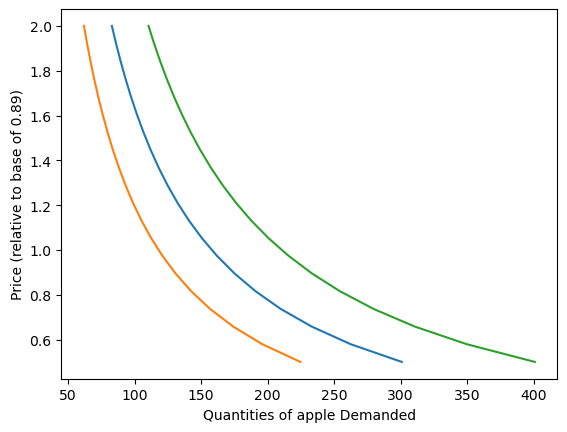

In [12]:
#Setting up reference prices
import matplotlib.pyplot as plt
%matplotlib inline

scale = np.linspace(.5,2,20)

# Reference prices
pbar = p.xs('2005-06',level='t').groupby('j').mean()
#pbar = pbar[use]

def my_prices(p0,p=pbar,j=use):
    """
    This just changes the price of good j, holding other prices constant
    """
    p = p.copy()
    p.loc[j] = p0
    return p


# Demand for Millet for household at median budget
plt.plot([r.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([r.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([r.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

In [13]:
#test
r.demands(20000,pbar).index.tolist()

['apple',
 'banana',
 'bidi',
 'biscuits',
 'bitter gourd',
 'black pepper',
 'bread (bakery)',
 'brinjal',
 'cabbage',
 'candle ',
 'carrot',
 'cauliflower',
 'chicken',
 'chillis (green)',
 'cigarettes ',
 'coffee: powder',
 'cooked meals',
 'cucumber',
 'dry chillies',
 'edible oil (others)',
 'eggs',
 'electricity ',
 'firewood & chips',
 'fish ( fresh )',
 'garlic',
 'ghee',
 'ginger',
 'goat meat',
 'gourd',
 'gram (whole)',
 'grapes',
 'guava',
 'jam, jelly',
 'kerosene-other sources',
 'kerosene-pds ',
 "lady's finger",
 'lemon',
 'lpg',
 'maida',
 'mango',
 'matches ',
 'milk: liquid',
 'moong',
 'onion',
 'orange,mausami',
 'other beverages (cocoa, chocolate etc.)',
 'other fresh fruits',
 'other processed food',
 'other pulse products',
 'other pulses',
 'other spices',
 'other vegetables',
 'palak',
 'peas-vegetables',
 'pickles',
 'potato',
 'prepared sweets',
 'raisin (kishmish, monacca etc.)',
 'rice - other sources',
 'salt ',
 'salted refreshments',
 'sewai, noodles',


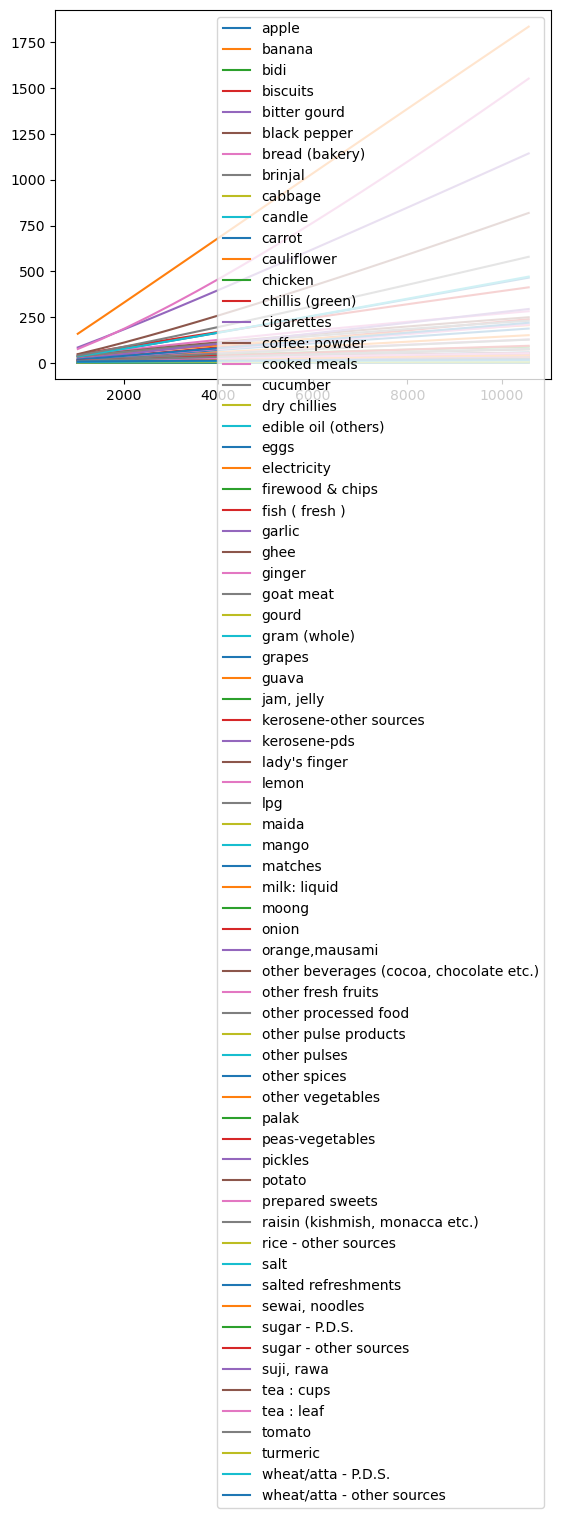

In [14]:
fig,ax = plt.subplots()

# Different budgets to evaluate demands at
X = np.linspace(xbar.quantile(0.001),xbar.quantile(0.99),20)

#Plotting
ax.plot(X,[r.demands(x,pbar) for x in X])
ax.legend(r.demands(xref,pbar).index.tolist())

Text(0.5, 1.0, 'Engel Curves')

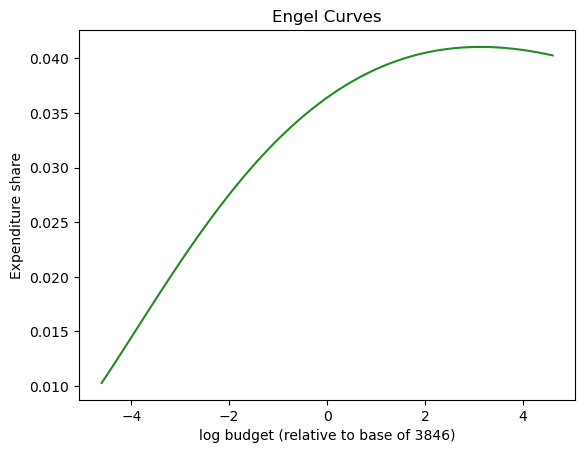

In [17]:
#Plotting the Engel Curve
fig,ax = plt.subplots()

scale = np.geomspace(0.01,100,100)
ax.plot(np.log(scale),[(r.expenditures(s*xref,pbar)/(s*xref))[use] for s in scale], color='forestgreen')
ax.set_xlabel(f'log budget (relative to base of {xref:.0f})')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

In [ ]:
#Plotting utilities across different household incomes 
#r.indirect_utility?